In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.utils.impute.pipeline import rooms, bedrooms

In [2]:
df_train = pd.read_parquet("../data/processed/df_train.parquet", engine="pyarrow")
df_test = pd.read_parquet("../data/processed/df_test.parquet", engine="pyarrow")

In [29]:
df_train.head()

,ad_type,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type,...,published_suburb_Villa Satyta,published_suburb_Villa Soldati,published_suburb_Villa Urquiza,published_suburb_Villa Vatteone,published_suburb_Villa del Parque,published_suburb_Wilde,published_suburb_Zona 3,published_suburb_Zona 9,published_suburb_Águila,price
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,-34.663334,-58.486344,3.0,2.666667,1.333333,87.0,87.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
98,0.0,-34.603990,-58.412370,1.0,1.000000,1.000000,28.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98000.0
100,0.0,-34.691785,-58.406821,1.0,1.000000,1.000000,36.0,36.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67000.0
101,0.0,-34.553008,-58.457528,3.0,2.000000,2.000000,74.0,74.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335000.0
103,0.0,-34.603990,-58.412370,1.0,1.000000,1.000000,28.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98000.0


In [3]:
df_train.isna().sum().sort_values(ascending=False)

ad_type                                0
published_suburb_Godoy Cruz            0
published_suburb_General Levalle       0
published_suburb_General Paz           0
published_suburb_General San Martín    0
                                      ..
suburb_Rafaela                         0
suburb_Recoleta                        0
suburb_República de la Sexta           0
suburb_Resistencia                     0
price                                  0
Length: 612, dtype: int64

In [4]:
df_test.isna().sum().sort_values(ascending=False)

price                                          6000
published_suburb_Godoy Cruz                       0
published_suburb_General Levalle                  0
published_suburb_General Paz                      0
published_suburb_General San Martín               0
                                               ... 
suburb_Rafaela                                    0
suburb_Recoleta                                   0
suburb_República de la Sexta                      0
suburb_Resistencia                                0
published_suburb_Barrio Cerrado Los Troncos       0
Length: 612, dtype: int64

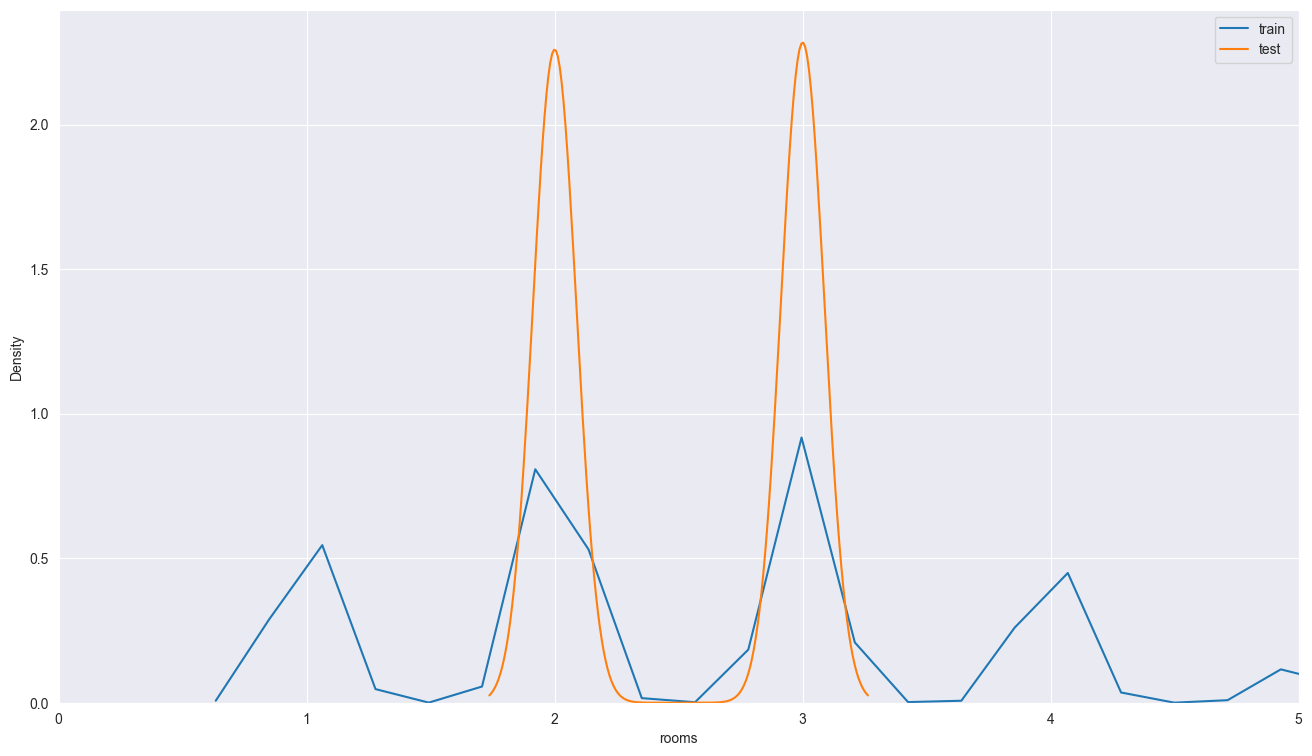

In [10]:
plt.figure(figsize=(16,9))
sns.kdeplot(np.ceil(df_train["rooms"]), label="train")
sns.kdeplot(df_test["rooms"], label="test")

plt.xlim(0,5)
plt.legend()
plt.show()

In [11]:
np.ceil(df_train["rooms"]).value_counts()

rooms
2.0     42962
3.0     39803
1.0     26989
4.0     22855
5.0      5947
6.0      1690
7.0       668
8.0       342
9.0        92
10.0       83
12.0       27
11.0       22
15.0       14
14.0        8
16.0        6
20.0        6
18.0        3
21.0        3
19.0        3
13.0        3
35.0        2
31.0        2
30.0        2
32.0        1
17.0        1
26.0        1
28.0        1
43.0        1
22.0        1
Name: count, dtype: int64

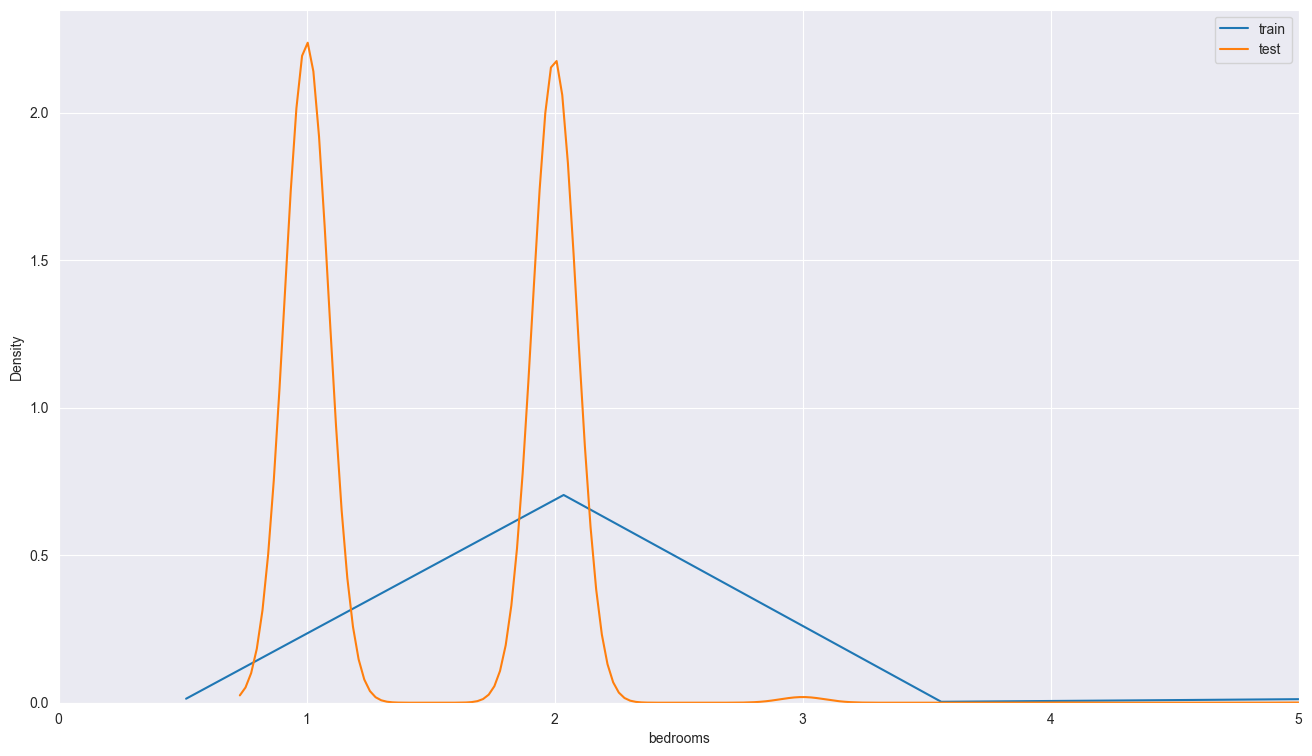

In [31]:
plt.figure(figsize=(16,9))
sns.kdeplot(np.ceil(df_train["bedrooms"]), label="train")
sns.kdeplot(df_test["bedrooms"], label="test")

plt.xlim(0,5)
plt.legend()
plt.show()

In [33]:
np.ceil(df_train["bedrooms"]).value_counts()

bedrooms
1.0      70105
2.0      41502
3.0      23461
4.0       5001
5.0        815
6.0        320
7.0        178
8.0         40
9.0         25
10.0        17
14.0        13
11.0        12
125.0        7
12.0         5
15.0         5
19.0         3
13.0         3
77.0         3
153.0        2
17.0         2
24.0         2
18.0         2
36.0         2
26.0         2
29.0         1
42.0         1
16.0         1
60.0         1
303.0        1
25.0         1
20.0         1
30.0         1
70.0         1
130.0        1
21.0         1
Name: count, dtype: int64

In [34]:
np.ceil(df_test["bedrooms"]).value_counts()

bedrooms
1.0    3024
2.0    2948
3.0      26
5.0       1
4.0       1
Name: count, dtype: int64

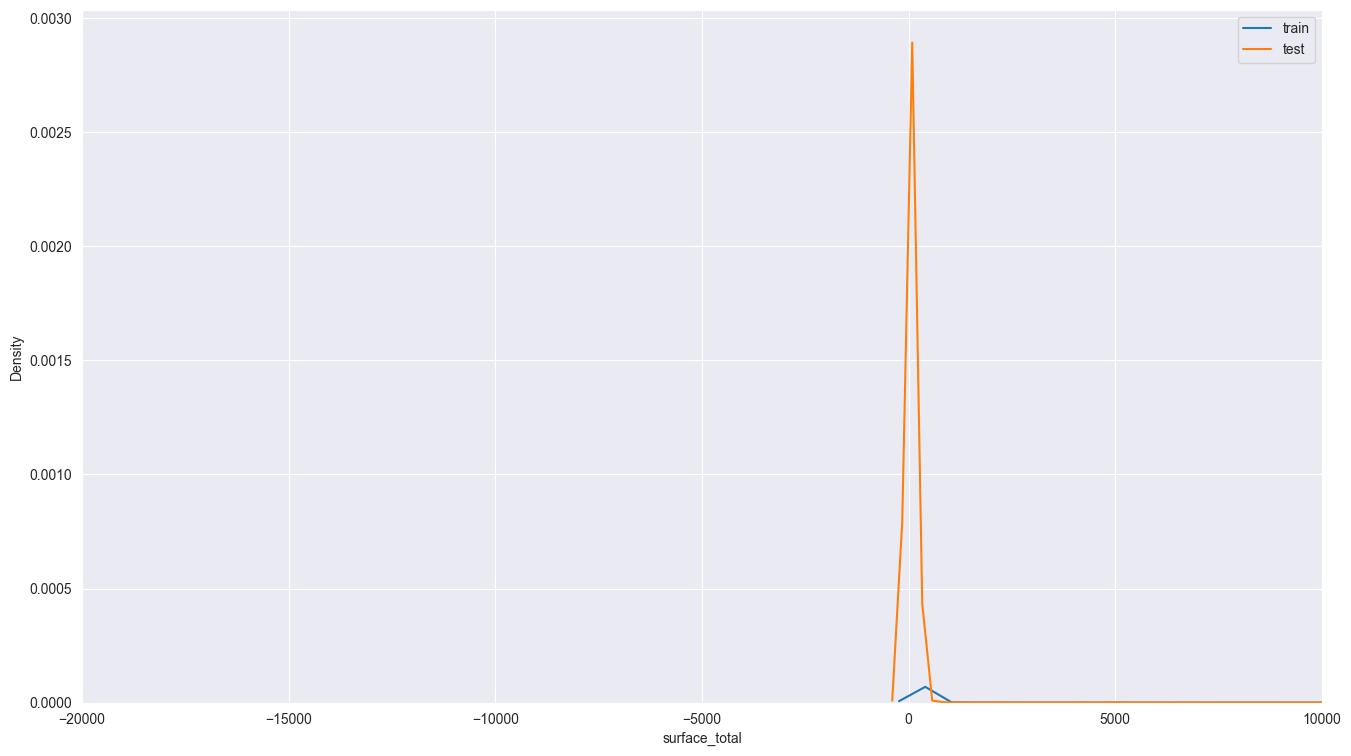

In [26]:
plt.figure(figsize=(16,9))
sns.kdeplot(df_train["surface_total"], label="train")
sns.kdeplot(df_test["surface_total"], label="test")

plt.xlim(-20000,10000)
plt.legend()
plt.show()

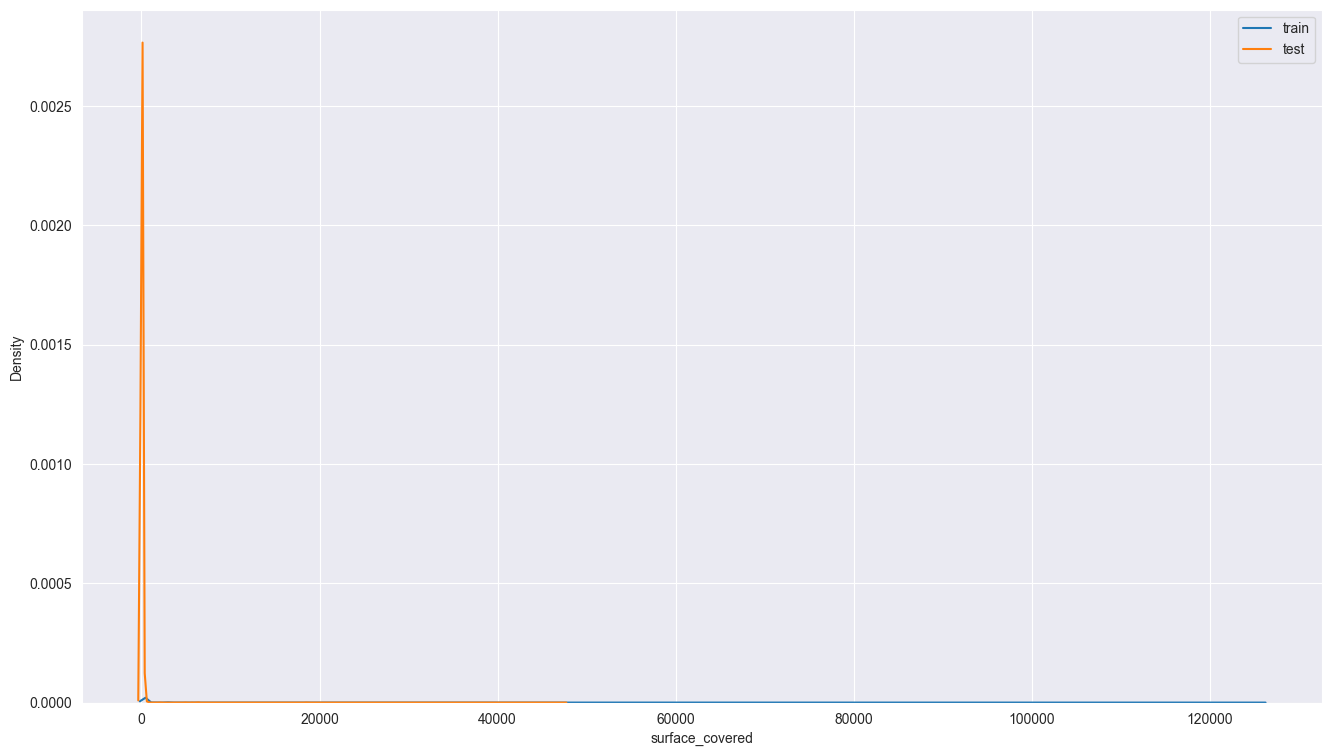

In [28]:
plt.figure(figsize=(16,9))
sns.kdeplot(df_train["surface_covered"], label="train")
sns.kdeplot(df_test["surface_covered"], label="test")

# plt.xlim(-20000,10000)
plt.legend()
plt.show()

<Axes: xlabel='price', ylabel='Density'>

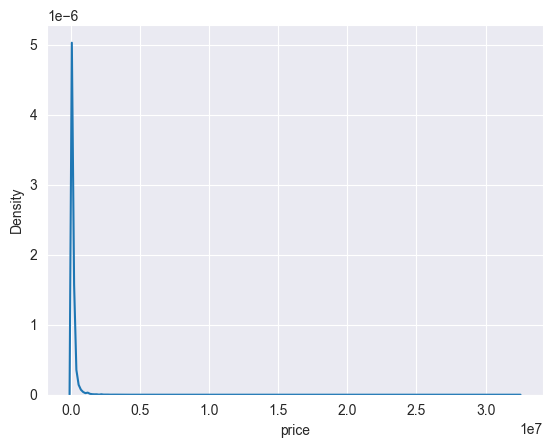

In [38]:
sns.kdeplot(data=df_train, x="price")
